In [2]:
from face_landmarkAU import Faceannotation
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
land = Faceannotation()
face_img_path = "BP4D/data/F002/T1/0000.jpg"
landmark,img = land(face_img_path,True)


In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img)

In [ ]:
from collections import OrderedDict
face_dict = OrderedDict({'1':[36,37,38,39,40,41],
                         '2':[42,43,44,45,46,47],
                         '3':[27,31,33,35],
                         '4':[17,18,19,20,21],
                         '5':[22,23,24,25,26],
                         '6':[48,49,52,52,53,54,55,56,57,58,59]                       
                        })

face_classes = {'eye':['1','2'],     
                'nose':['3'],
                'mouth':['6'],
                'eyebrow':['4','5']
                }

In [ ]:
trn_img = cv2.imread( "/data/datasets/users/subhash/BP4D/data/F002/T1/0000.jpg")
trn_img=cv2.cvtColor(trn_img, cv2.COLOR_BGR2RGB)
for land,values in face_dict.items():
    polygon = []
    for value in values:
        polygon.append(landmark[value])
    polygon = np.array(polygon,np.int32)
    s = np.amin(polygon,axis=0)
    e= np.amax(polygon,axis=0)
    s = s-5;e=e+5
    bbox = np.append(s,e-s)
    image = cv2.rectangle(trn_img,tuple(s-5),tuple(e+5),(255, 0, 0),2)
fig = plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()
plt.close('all')

In [ ]:
imgg = cv2.imread('/data/datasets/users/subhash/'+"BP4D/data/F002/T1/0000.jpg")
print(imgg.shape)
print(np.shape(np.asarray(imgg)))

In [3]:
land = Faceannotation()
face_img_path = "BP4D/data/F002/T1/0000.jpg"
img,bboxes,_  = land(face_img_path,True) 


RuntimeError: Unable to open ./image_toolkit/shape_predictor_68_face_landmarks.dat

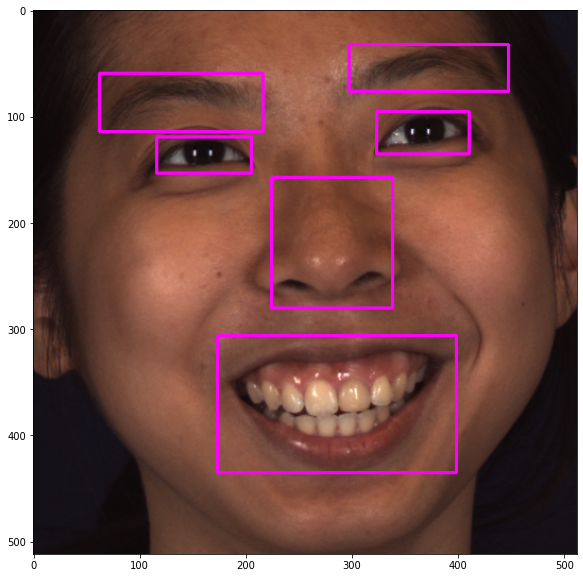

In [62]:
for box in bboxes['bboxes'].values():
    box = box.astype(np.int)
    img = cv2.rectangle(img,tuple(box[0]-5),tuple(box[1]+5),(255, 0, 255),2)
#img = cv2.rectangle(img,(100,100),(300,300),(255, 0, 255),2)
fig = plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
plt.close('all')

In [66]:
img.shape

(512, 512, 3)

In [63]:
bboxes = np.array(list(bboxes['bboxes'].values()))
bboxes

array([[[121.45116279, 124.80469897],
        [200.83100775, 148.86343612]],

       [[328.63255814, 100.74596182],
        [405.63100775, 130.81938326]],

       [[229.40775194, 162.39647577],
        [333.39534884, 275.9236417 ]],

       [[ 67.47286822,  64.65785609],
        [211.94418605, 109.76798825]],

       [[302.4372093 ,  37.5917768 ],
        [442.14573643,  71.42437592]],

       [[178.60465116, 311.25991189],
        [393.72403101, 430.80176211]]])

In [64]:
import torch
def box_xyxy_to_cxcywh(x):
    x0, y0, x1, y1 = x.unbind(-1)
    w,h = x1-x0, y1-y0
    b = [(x0 + x1) / 2, (y0 + y1) / 2, w, h]
    return torch.stack(b, dim=-1)/torch.tensor([512], dtype=torch.float32)

In [65]:
bboxes = torch.as_tensor(bboxes, dtype=torch.float32).reshape(-1, 4)
box_xyxy_to_cxcywh(bboxes

tensor([[0.3147, 0.2673, 0.1550, 0.0470],
        [0.7171, 0.2261, 0.1504, 0.0587],
        [0.5496, 0.4280, 0.2031, 0.2217],
        [0.2729, 0.1703, 0.2822, 0.0881],
        [0.7271, 0.1065, 0.2729, 0.0661],
        [0.5589, 0.7247, 0.4202, 0.2335]])

In [35]:
bboxes.unbind(-1)

(tensor([121.4512, 328.6326, 229.4077,  67.4729, 302.4372, 178.6046]),
 tensor([124.8047, 100.7460, 162.3965,  64.6579,  37.5918, 311.2599]),
 tensor([200.8310, 405.6310, 333.3954, 211.9442, 442.1457, 393.7240]),
 tensor([148.8634, 130.8194, 275.9236, 109.7680,  71.4244, 430.8018]))

In [71]:
import os
int(os.environ['WORLD_SIZE'])

KeyError: 'WORLD_SIZE'

In [ ]:
polygon=[]
for value in face_dict['6']:
    polygon.append(landmarks[value])
polygon = np.array(polygon,np.int32)
s = np.amin(polygon,axis=0)
e= np.amax(polygon,axis=0)
cv2.circle(trn_img,tuple(s),0,(255, 0, 0),5)
cv2.circle(trn_img,tuple(e),0,(255, 0, 0),5)
cv2.circle(trn_img,tuple(s-10),0,(0, 255, 0),5)
cv2.circle(trn_img,tuple(e+10),0,(0, 255, 0),5)
image = cv2.rectangle(trn_img,tuple(s),tuple(e),(255, 0, 0),2)
fig = plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()
plt.close('all')

In [ ]:
import numpy as np
P = dict(zip(np.arange(10),np.arange(10)))

In [ ]:
list(map(lambda k: k+1, P.values()))

In [ ]:
P